In [3]:
import numpy as np
import pandas as pd

In [4]:
import os
import cv2

data_folder = 'data'
cancer_folder = os.path.join(data_folder, 'cancer')
non_cancer_folder = os.path.join(data_folder, 'non-cancer')

# Check if the data folder exists, and create it if necessary
if not os.path.exists(data_folder):
    os.makedirs(data_folder)

# Check if the cancer and non-cancer folders exist, and create them if necessary
if not os.path.exists(cancer_folder):
    os.makedirs(cancer_folder)

if not os.path.exists(non_cancer_folder):
    os.makedirs(non_cancer_folder)

# Initialize empty lists to store images and labels
images = []
labels = []


In [5]:
# Iterate through the cancer images folder
for filename in os.listdir(cancer_folder):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        image_path = os.path.join(cancer_folder, filename)
        image = cv2.imread(image_path)
        # You can preprocess the image here if required
        images.append(image)
        labels.append(1)  # 1 represents cancer

# Iterate through the non-cancer images folder
for filename in os.listdir(non_cancer_folder):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        image_path = os.path.join(non_cancer_folder, filename)
        image = cv2.imread(image_path)
        # You can preprocess the image here if required
        images.append(image)
        labels.append(0)  # 0 represents non-cancer

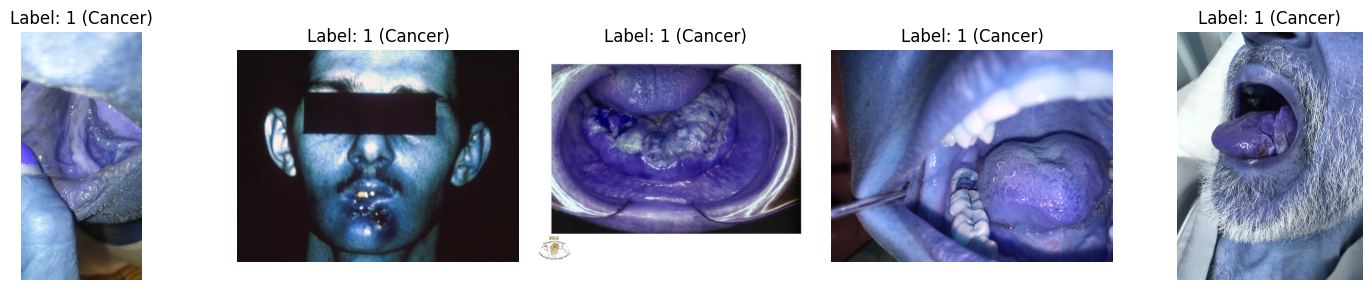

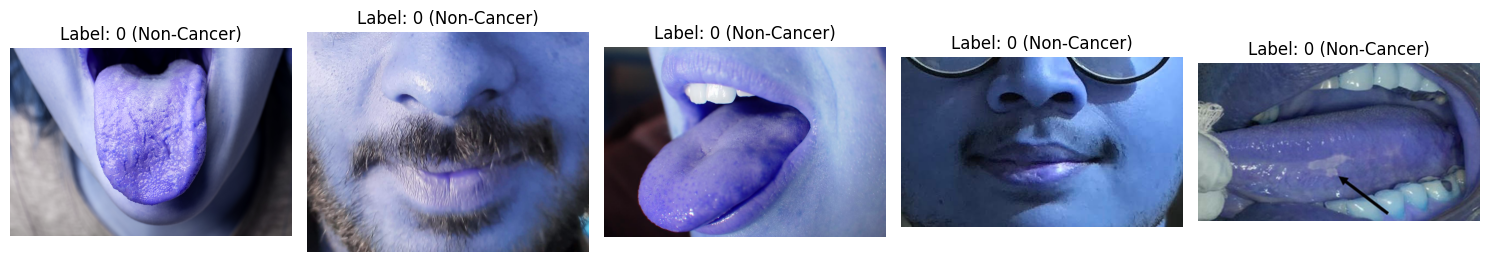

In [6]:
import matplotlib.pyplot as plt

# Display five cancer images
num_samples = 5
cancer_images = [image for image, label in zip(images, labels) if label == 1][:num_samples]

fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))

for i in range(num_samples):
    axes[i].imshow(cancer_images[i])
    axes[i].set_title("Label: 1 (Cancer)")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# Display five non-cancer images
non_cancer_images = [image for image, label in zip(images, labels) if label == 0][:num_samples]

fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))

for i in range(num_samples):
    axes[i].imshow(non_cancer_images[i])
    axes[i].set_title("Label: 0 (Non-Cancer)")
    axes[i].axis('off')

plt.tight_layout()
plt.show()


In [7]:
import numpy as np

# Convert the images list to a NumPy array
images_array = np.array(images)

# Convert the labels list to a NumPy array
labels_array = np.array(labels)

# Print the shape of the arrays
print("Images array shape:", images_array.shape)
print("Labels array shape:", labels_array.shape)


Images array shape: (117,)
Labels array shape: (117,)


<ipython-input-7-e7f9e91ae56e>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  images_array = np.array(images)


In [8]:
import tensorflow as tf

# Check if GPU is available
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    # Allow memory growth for the GPU
    tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)


In [9]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(images_array, labels_array, test_size=0.2, random_state=42)

# Perform data augmentation on the training set
datagen = ImageDataGenerator(
    zoom_range = 0.2,
    shear_range = 0.2,
    rescale = 1./255,
    horizontal_flip = True
)

augmented_images = []
augmented_labels = []

for image, label in zip(X_train, y_train):
    image = image.reshape((1,) + image.shape)
    label = np.array([label])
    augmented_data = datagen.flow(image, label, batch_size=1)
    for augmented_image, augmented_label in augmented_data:
        augmented_images.append(augmented_image[0])
        augmented_labels.append(augmented_label[0])
        break

# Convert augmented data to NumPy arrays
augmented_images_array = np.array(augmented_images)
augmented_labels_array = np.array(augmented_labels)

# Display the shapes of the augmented data
print("Augmented Images array shape:", augmented_images_array.shape)
print("Augmented Labels array shape:", augmented_labels_array.shape)

# Print the shapes of the train and test sets
print("Train Images shape:", X_train.shape)
print("Train Labels shape:", y_train.shape)
print("Test Images shape:", X_test.shape)
print("Test Labels shape:", y_test.shape)


Augmented Images array shape: (93,)
Augmented Labels array shape: (93,)
Train Images shape: (93,)
Train Labels shape: (93,)
Test Images shape: (24,)
Test Labels shape: (24,)


<ipython-input-9-19ad967560aa>:28: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  augmented_images_array = np.array(augmented_images)


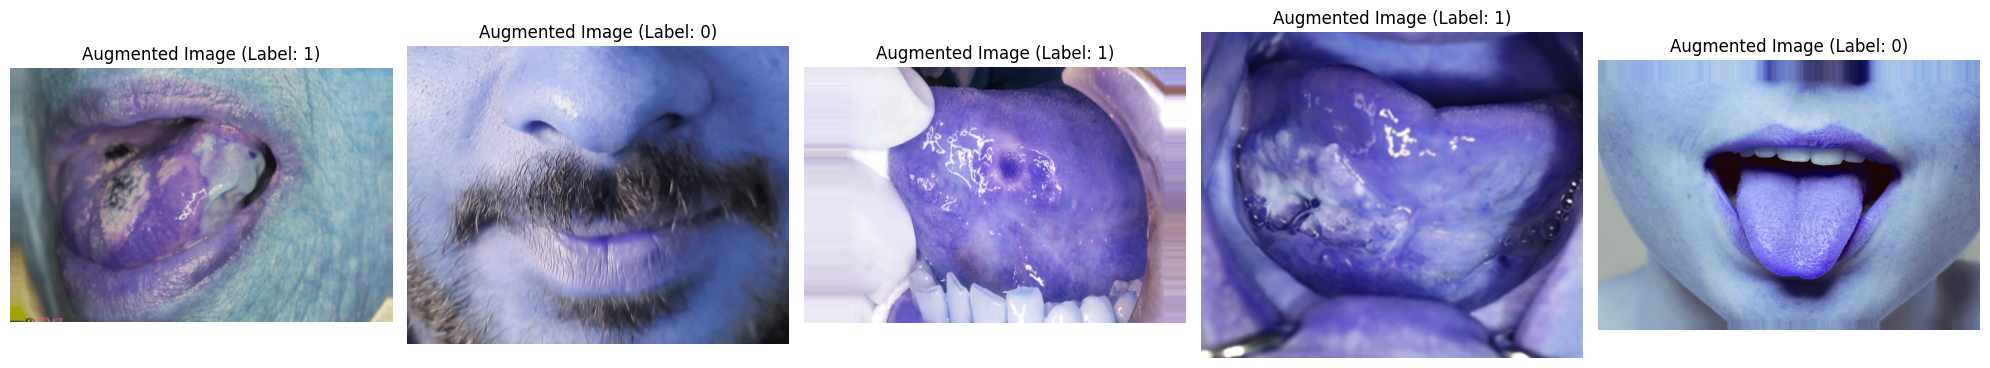

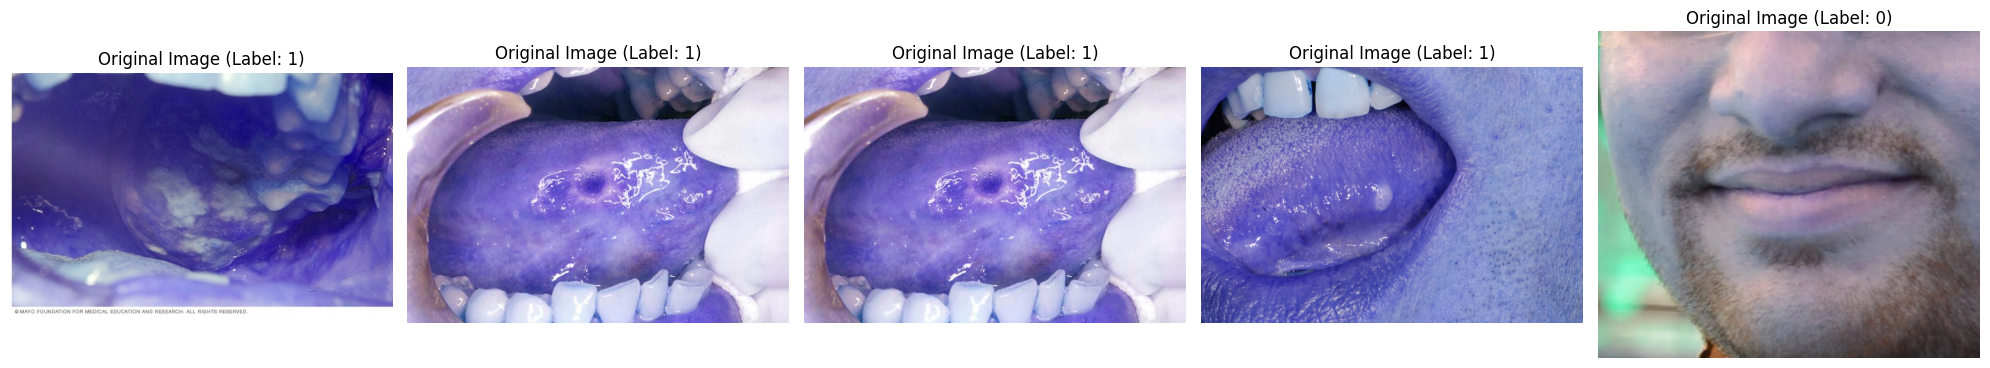

In [10]:
import random
import matplotlib.pyplot as plt

# Display five random images from augmented_images_array with labels
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for i in range(5):
    random_augmented_index = random.randint(0, len(augmented_images_array) - 1)
    random_augmented_image = augmented_images_array[random_augmented_index]
    random_augmented_label = augmented_labels_array[random_augmented_index]

    axes[i].imshow(random_augmented_image)
    axes[i].set_title("Augmented Image (Label: {})".format(random_augmented_label))
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# Display five random images from X_train with labels
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for i in range(5):
    random_original_index = random.randint(0, len(X_train) - 1)
    random_original_image = X_train[random_original_index]
    random_original_label = y_train[random_original_index]

    axes[i].imshow(random_original_image)
    axes[i].set_title("Original Image (Label: {})".format(random_original_label))
    axes[i].axis('off')

plt.tight_layout()
plt.show()


In [11]:
import keras
from keras.layers import Dense,Conv2D, Flatten, MaxPool2D, Dropout
from keras.models import Sequential
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.optimizers import Adam

In [12]:
# Existing model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
# model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=1, activation='sigmoid'))

# Additional layers for complexity
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=64, activation='relu'))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
learning_rate = 0.001
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

# Display the updated model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 126, 126, 32)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 60, 60, 128)       7

In [13]:
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming you have the following sets: X_train, X_test, augmented_images_array, y_train, y_test, augmented_images_labels

# Mix X_train, X_test, and augmented_images_array into a single array for X
X = np.concatenate((X_train, X_test, augmented_images_array), axis=0)

# Mix y_train, y_test, and augmented_images_labels into a single array for y
y = np.concatenate((y_train, y_test, augmented_labels_array), axis=0)

# Combine X and y into the 'data' set
data = (X, y)

# Split the 'data' set into validation and test sets
validation_size = 0.15
test_size = 0.15

# First, split 'data' into 'train_data' and 'temp_data' for further splitting
X_train_data, X_temp, y_train_data, y_temp = train_test_split(X, y, test_size=(validation_size + test_size), random_state=42)

# Now, split 'temp_data' into 'val_data' and 'test_data'
X_val_data, X_test_data, y_val_data, y_test_data = train_test_split(X_temp, y_temp, test_size=(test_size / (validation_size + test_size)), random_state=42)

# Now you have X_train_data, y_train_data (train set), X_val_data, y_val_data (validation set), and X_test_data, y_test_data (test set)
# You can use these datasets during model training and evaluation

# Optionally, you can print the sizes of the datasets to confirm the split ratios
print("Train set size:", len(X_train_data))
print("Validation set size:", len(X_val_data))
print("Test set size:", len(X_test_data))


Train set size: 147
Validation set size: 31
Test set size: 32


In [14]:
import numpy as np
from skimage.transform import resize

def preprocess_data(data, target_shape):
    """
    Preprocesses the input data and converts it to a format suitable for CNN model training.

    Parameters:
        data (list): Input data containing images as numpy arrays.
        target_shape (tuple): The desired shape for the images (e.g., (height, width, channels)).

    Returns:
        numpy.ndarray: Preprocessed and normalized data as a numpy array.
    """
    # Resize images to the target shape
    resized_data = [resize(image, target_shape, mode='reflect') for image in data]

    # Convert the data to a numpy array with float32 data type
    data_array = np.array(resized_data, dtype=np.float32)

    # Normalize the data (assuming the data is in range [0, 255])
    data_array /= 255.0

    return data_array

# Assuming you have X_train_data as an array of arrays containing images
target_shape = (256, 256, 3)  # Specify your desired target shape
X_train_data_preprocessed = preprocess_data(X_train_data, target_shape)

# You can use X_train_data_preprocessed for model training


In [15]:
X_train_data_preprocessed

array([[[[1.6078344e-03, 1.6955986e-03, 2.8272602e-03],
         [1.5879029e-03, 1.6801751e-03, 2.8070635e-03],
         [1.5651960e-03, 1.6567663e-03, 2.8156280e-03],
         ...,
         [1.9404790e-03, 1.9992313e-03, 3.3734608e-03],
         [1.9360147e-03, 1.9958278e-03, 3.3679358e-03],
         [1.9239493e-03, 1.9716972e-03, 3.3679358e-03]],

        [[1.6077743e-03, 1.6955674e-03, 2.8271710e-03],
         [1.5878648e-03, 1.6801370e-03, 2.8070533e-03],
         [1.5651336e-03, 1.6566922e-03, 2.8156557e-03],
         ...,
         [1.9404674e-03, 1.9992313e-03, 3.3734378e-03],
         [1.9359904e-03, 1.9957793e-03, 3.3679358e-03],
         [1.9239180e-03, 1.9716348e-03, 3.3679358e-03]],

        [[1.6077034e-03, 1.6955306e-03, 2.8270658e-03],
         [1.5878198e-03, 1.6800921e-03, 2.8070407e-03],
         [1.5650599e-03, 1.6566048e-03, 2.8156883e-03],
         ...,
         [1.9404538e-03, 1.9992313e-03, 3.3734103e-03],
         [1.9359618e-03, 1.9957221e-03, 3.3679358e-03],
  

In [16]:
X_train_data_preprocessed.dtype

dtype('float32')

In [17]:
import tensorflow as tf

# Convert NumPy arrays to TensorFlow tensors
X_train_data_tensor = tf.convert_to_tensor(X_train_data_preprocessed)

In [18]:
y_train_data_tensor = tf.convert_to_tensor(y_train_data)

In [19]:
# Assuming you have X_train_data as an array of arrays containing images
target_shape = (256, 256, 3)  # Specify your desired target shape
X_val_data_preprocessed = preprocess_data(X_val_data, target_shape)

In [20]:
X_val_data_tensor = tf.convert_to_tensor(X_val_data_preprocessed)
y_val_data_tensor = tf.convert_to_tensor(y_val_data)

In [21]:
# Assuming you have X_train_data as an array of arrays containing images
target_shape = (256, 256, 3)  # Specify your desired target shape
X_test_data_preprocessed = preprocess_data(X_test_data, target_shape)


X_test_data_tensor = tf.convert_to_tensor(X_test_data_preprocessed)
y_test_data_tensor = tf.convert_to_tensor(y_test_data)

In [22]:
# Adding Model check point Callback
mc = ModelCheckpoint(filepath="oc_cnn_last_model.hdf5",
                     verbose= 0,
                     save_best_only= True
                     );

call_back = [ mc ];

In [23]:
# Fitting the Model
history = model.fit(X_train_data_tensor,
                    y_train_data_tensor,
                    batch_size=32,
                    epochs=32,
                    validation_data=(X_val_data_tensor, y_val_data_tensor),
                    callbacks=[call_back])


Epoch 1/32
5/5 [==============================] - 19s 1s/step - loss: 0.6847 - accuracy: 0.5442 - val_loss: 0.6017 - val_accuracy: 0.8065
Epoch 2/32


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


5/5 [==============================] - 1s 204ms/step - loss: 0.6573 - accuracy: 0.6531 - val_loss: 0.5177 - val_accuracy: 0.8065
Epoch 3/32
5/5 [==============================] - 1s 168ms/step - loss: 0.6510 - accuracy: 0.6531 - val_loss: 0.5750 - val_accuracy: 0.8065
Epoch 4/32
5/5 [==============================] - 1s 180ms/step - loss: 0.6601 - accuracy: 0.6531 - val_loss: 0.5631 - val_accuracy: 0.8065
Epoch 5/32
5/5 [==============================] - 1s 178ms/step - loss: 0.6455 - accuracy: 0.6531 - val_loss: 0.5234 - val_accuracy: 0.8065
Epoch 6/32
5/5 [==============================] - 1s 180ms/step - loss: 0.6413 - accuracy: 0.6531 - val_loss: 0.5754 - val_accuracy: 0.8065
Epoch 7/32
5/5 [==============================] - 1s 173ms/step - loss: 0.6575 - accuracy: 0.6531 - val_loss: 0.5674 - val_accuracy: 0.8065
Epoch 8/32
5/5 [==============================] - 1s 168ms/step - loss: 0.6588 - accuracy: 0.6531 - val_loss: 0.5618 - val_accuracy: 0.8065
Epoch 9/32
5/5 [===============

In [24]:
# Loading the Best Fit Model
model = load_model("./oc_cnn_last_model.hdf5")

In [25]:
# Assuming you have already trained your model and now want to evaluate it on the test data

import tensorflow as tf

# Load your test data (X_test and y_test)
# Replace X_test and y_test with your actual test data
X_test = X_test_data_tensor
y_test = y_test_data_tensor

# Assuming you have compiled your model already
# Replace 'model' with the variable name of your trained model
# If you haven't compiled your model, make sure to compile it with the appropriate loss and metrics before calling 'evaluate()'

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

# Print the test accuracy
print("Test accuracy:", test_accuracy)

Test accuracy: 0.53125


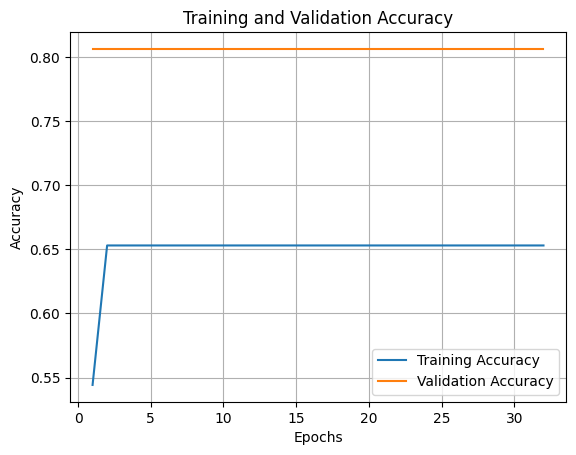

In [26]:
import matplotlib.pyplot as plt

# Assuming you have trained your model and obtained the history containing training metrics
# Replace 'history' with the variable that holds the training history of your model
# The history typically contains the training and validation accuracy for each epoch

# Access the accuracy values from the history
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Get the number of epochs
epochs = range(1, len(training_accuracy) + 1)

# Plot the training and validation accuracy
plt.plot(epochs, training_accuracy, label='Training Accuracy')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


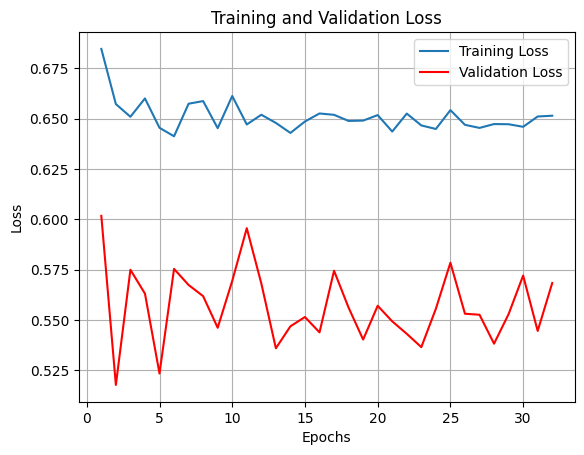

In [27]:
import matplotlib.pyplot as plt

# Assuming you have trained your model and obtained the history containing training metrics
# Replace 'history' with the variable that holds the training history of your model
# The history typically contains the training and validation loss for each epoch

# Access the loss values from the history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Get the number of epochs
epochs = range(1, len(training_loss) + 1)

# Plot the training and validation loss
plt.plot(epochs, training_loss, label='Training Loss')
plt.plot(epochs, validation_loss, label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [28]:
import numpy as np
from sklearn.metrics import f1_score, confusion_matrix

# Load your test data (X_test and y_test)
# Replace X_test and y_test with your actual test data
X_test = X_test_data_tensor
y_test = y_test_data_tensor

# Assuming you have compiled your model already
# Replace 'model' with the variable name of your trained model
# If you haven't compiled your model, make sure to compile it with the appropriate loss and metrics before calling 'evaluate()'

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

# Print the test accuracy
print("Test accuracy:", test_accuracy)

# Make predictions on the test data
predictions = model.predict(X_test)

# Convert predictions to binary values (0 or 1)
binary_predictions = np.round(predictions)

# Reshape y_test if needed
y_test = np.array(y_test).reshape(binary_predictions.shape)

# Calculate F1 score
f1 = f1_score(y_test, binary_predictions)

# Print the F1 score
print("F1 Score:", f1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, binary_predictions)
print("Confusion Matrix:")
print(conf_matrix)


Test accuracy: 0.53125
1/1 [==============================] - 0s 160ms/step
F1 Score: 0.6938775510204082
Confusion Matrix:
[[ 0 15]
 [ 0 17]]
